In [427]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [428]:
dim = 1

def f(coord):
    if coord >= 35:
        return coord - np.sin(coord) - 69
    else:
        return -coord

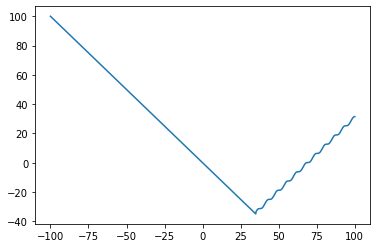

In [429]:
xs = np.linspace(-100, 100, 1000)
ys = list(map(f, xs))

plt.plot(xs, ys)
plt.show()

In [430]:
h = 1e-5

def gradient(coord):
    grad_list = np.array([], dtype=np.float64)
    for index, x in enumerate(coord):
        f_left = coord.copy()
        f_left[index] = f(x - h)

        f_right = coord.copy()
        f_right[index] = f(x + h)

        grad_2d = (f_right - f_left) / (2 * h)
        grad_list = np.concatenate((grad_list, grad_2d))

    return np.array(grad_list, dtype=np.float64)

In [431]:
lr = 0.9
iterations = 1000

points = np.zeros((iterations, 2))

def gradient_descent():
    coord = np.random.rand(dim) * random.randint(-100, 100)

    for i in range(iterations):
        points[i] = (coord, f(coord))
        coord = coord - lr * gradient(coord)

    plt.plot(points[:, 0], points[:, 1], 'r.')
    plt.plot(xs, ys)
    plt.show()

    return coord

/tmp/ipykernel_11042/671157361.py:10: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  points[i] = (coord, f(coord))


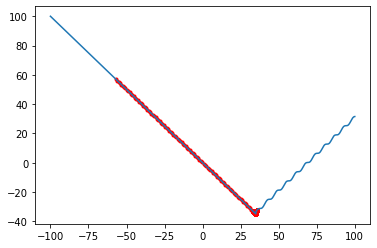

[33.48985094] [-33.48985094]


In [432]:
coord = gradient_descent()
print(coord, f(coord))